In [1]:
# Author: Davide Aloi
# Description: waffle graph for CRS results over time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# The first row of the excel file is the condition, the second one is the date.
# The other rows are the crs subscores: Auditory, Visual, Motor, Oromotor, Communication, Arousal
# The total is not included in the excel file as it's calculated later on
data = pd.read_excel('p01_crs_results.xlsx', header = None)
data_array = np.asarray(data.iloc[2:,:]).astype(int) # array containing only the CRS results
data.iloc[0] = data.iloc[0].astype('U')


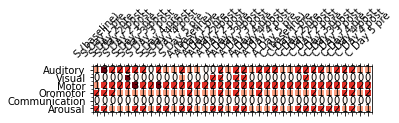

In [4]:
# width and height used for the waffle plot
width = data_array.shape[1]
height= data_array.shape[0]
total= width * height

# calculating array containing crs totals of each day
crs_totals = np.zeros([1, data_array.shape[1]])
for i in range(0, width):
    crs_totals[0,i] = np.sum(data_array[:,i])


#data_array = np.concatenate((data_array, crs_totals)) #adding total as last row

fig = plt.figure(figsize = (5, 30))
colormap = plt.cm.Reds

plt.matshow(data_array, cmap=colormap, fignum=1)

ax = plt.gca()

for (i, j), z in np.ndenumerate(data_array):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-0.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)


plt.xticks(np.arange(0, data_array.shape[1]))
ax.set_xticklabels(data.iloc[0])
plt.yticks(np.arange(0, data_array.shape[0]))
ax.set_yticklabels(['Auditory','Visual','Motor','Oromotor','Communication','Arousal'])
plt.xticks(rotation=45)
plt.show()

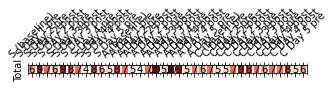

In [5]:
# Plotting CRS totals

data_array = crs_totals
width = data_array.shape[1]
height= data_array.shape[0]
total= width * height

#data_array = np.concatenate((data_array, crs_totals)) #adding total as last row

fig = plt.figure(figsize = (5, 30))
colormap = plt.cm.Reds

plt.matshow(data_array, cmap=colormap, fignum=1)

ax = plt.gca()

for (i, j), z in np.ndenumerate(data_array):
    ax.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')

ax.set_xticks(np.arange(-0.5, (width), 1), minor=True)
ax.set_yticks([])

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks(np.arange(0, data_array.shape[1]))
ax.set_xticklabels(data.iloc[0])
ax.set_yticklabels([])
plt.ylabel("Total")

plt.xticks(rotation=45)
plt.show()

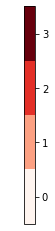

In [6]:
# colorbar crs subscores
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

fig, ax = plt.subplots(1, 1)

fraction = 1  # .05

cmap = plt.cm.Reds
norm = colors.BoundaryNorm([-0.5,0.5,1.5,2.5,3.5], cmap.N)

cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
            ticks = [0,1,2,3],
            ax=ax, pad=.05, fraction=fraction)

ax.axis('off')
plt.show()

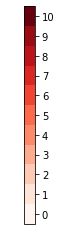

In [7]:
#colorbar totals
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

fig, ax = plt.subplots(1, 1)

fraction = 1  # .05

cmap = plt.cm.Reds
norm = colors.BoundaryNorm([-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5], cmap.N)

cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='Reds'),
            ticks = np.arange(0,11,1),
            ax=ax, pad=.05, fraction=fraction)

ax.axis('off')
plt.show()